In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import copy
from scipy import ndimage
import glob
%matplotlib inline

In [58]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.APDMap import APDMap

# 20171108-31の解析

In [98]:
vmem = RawCam(path='/mnt/recordings/SimulationResults/2D/20171108-31/', cam_type='numpy',
              image_height=200, image_width=200, frame_start=0, frame_end=300)

In [99]:
pmap = PhaseMap(vmem, shrink=1)
pvmap = PhaseVarianceMap(pmap, size=3)

In [101]:
np.max(pvmap.data[50, :, :])

0.73979515

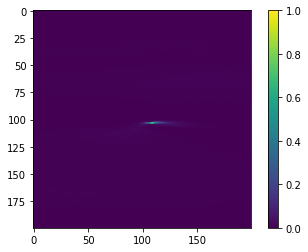

In [111]:
plt.imshow(pvmap.data[130, :, :], vmin=0, vmax=1)
plt.colorbar()

##### out_dir = '/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171124/20171108-31/vmem'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

for i in range(300):
    num = "{0:04d}".format(i)
    plt.imshow(vmem.data[i, :, :],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.text(5,20,"%s (ms)" %num, fontsize=17, color='w')
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, '%s.png'%num), dpi=300)
    plt.close()

In [112]:
out_dir = '/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171124/20171108-31/pvmap'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

for i in range(300):
    num = "{0:04d}".format(i)
    plt.imshow(pvmap.data[i, :, :],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.text(5,20,"%s (ms)" %num, fontsize=17, color='w')
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, '%s.png'%num), dpi=300)
    plt.close()

In [113]:
out_dir = '/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171124/20171108-31/core'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

for i in range(300):
    num = "{0:04d}".format(i)
    plt.imshow((pvmap.data[i, :, :]>0.4),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.text(5,20,"%s (ms)" %num, fontsize=17, color='w')
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, '%s.png'%num), dpi=300)
    plt.close()

In [119]:
core = (pvmap.data[10:180, :, :]>0.4)*1

In [123]:
trajectory = (np.sum(core, axis=0) > 0)

In [128]:
plt.imshow(trajectory, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171124/20171108-31/trajectory.png', dpi=300)
plt.close()

In [148]:
temp = np.load('/mnt/recordings/SimulationResults/2D/20171108-31/cell_0170/temp.npy')
plt.imshow(temp.reshape((200,200)), cmap='gray_r')

# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=16)
# cb.set_label(label='Temperature (K)', size=24)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171124/20171108-31/temp.png', dpi=300)
plt.close()

In [132]:
plt.colorbar?